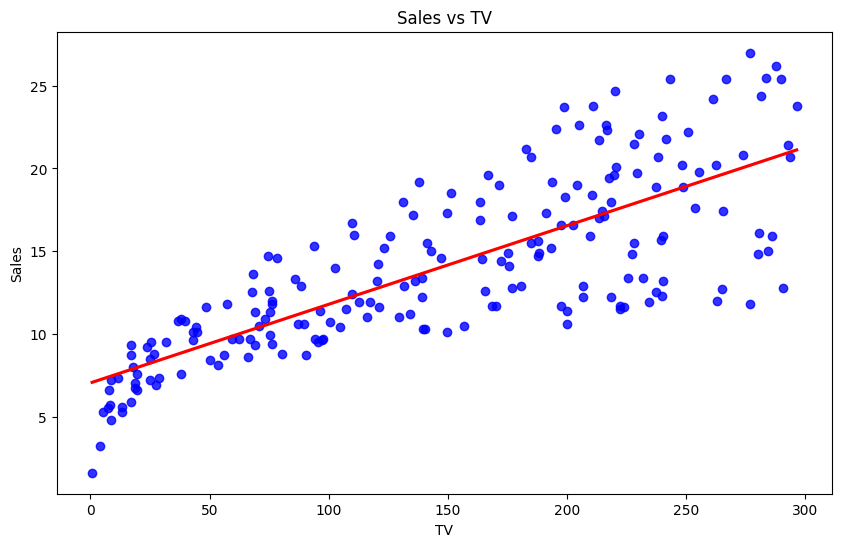

Feature: TV
Coefficient (a): 0.04600778960301721
Intercept (b): 7.292493773559356
MSE: 10.531027119817928
R-squared score: 0.6763151577939723


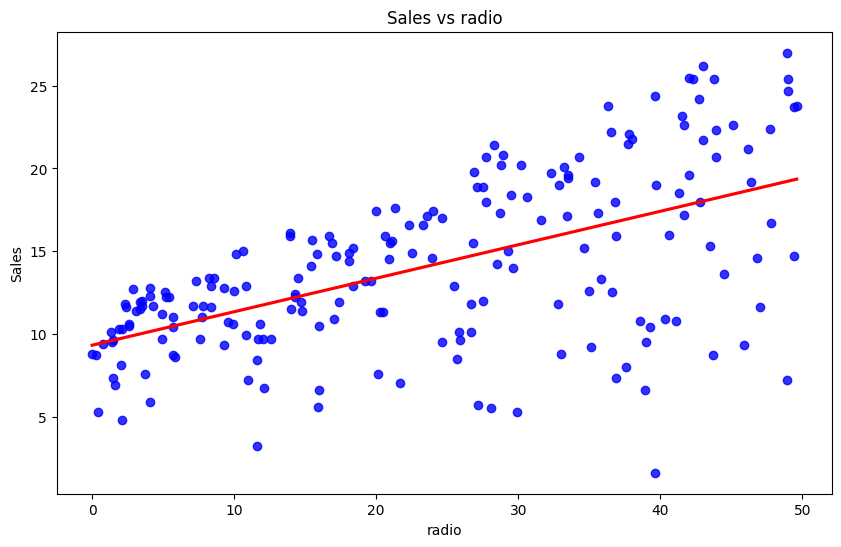

Feature: radio
Coefficient (a): 0.20651176537911192
Intercept (b): 9.387577017342657
MSE: 18.124620141137605
R-squared score: 0.22981692241915963


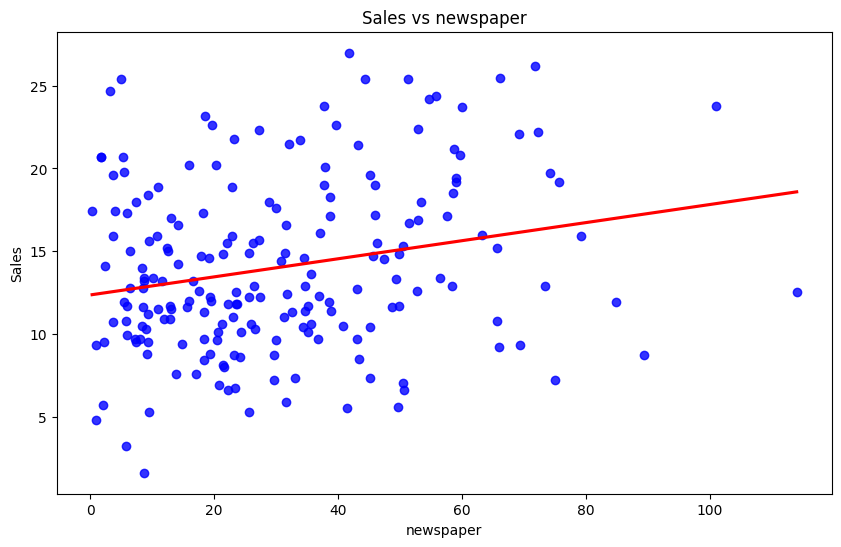

Feature: newspaper
Coefficient (a): 0.060303781082761
Intercept (b): 12.400810905018648
MSE: 25.737646228404888
R-squared score: -0.021217489521373478


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('Advertising.csv')

features = ['TV', 'radio', 'newspaper']

for feature in features:

    X = df[feature].values.reshape(-1,1)
    y = df['sales'].values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    a = regressor.coef_
    b = regressor.intercept_

    plt.figure(figsize=(10, 6))
    
    sns.regplot(x=df[feature], y=df['sales'], scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ci=None)
    
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    
    plt.show()
    
    print(f'Feature: {feature}')
    print('Coefficient (a):', a[0][0])
    print('Intercept (b):', b[0])
    print('MSE:', np.mean((y - a*X - b)**2))  
    print('R-squared score:', metrics.r2_score(y_test, y_pred))


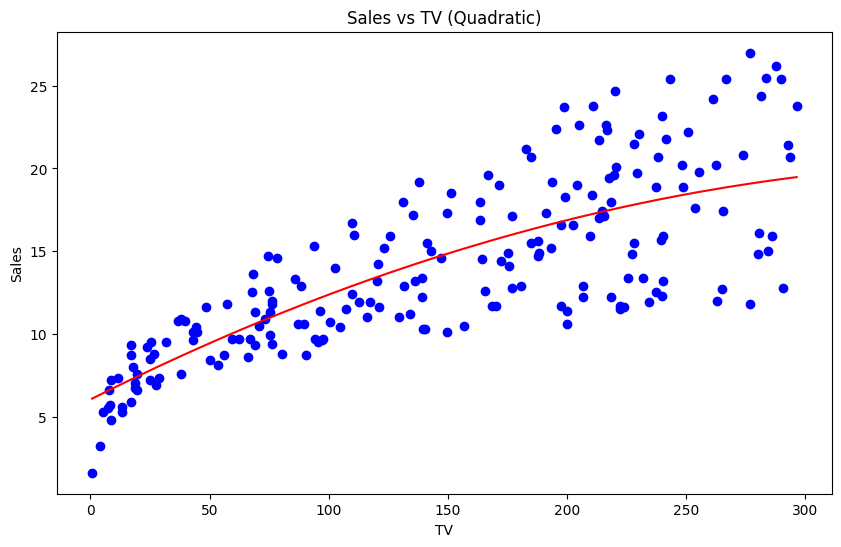

Feature: TV (Quadratic)
MSE: 10.685507926293752
Root Mean Squared Error: 3.268869518089358
R-squared score: 0.6604481473780814


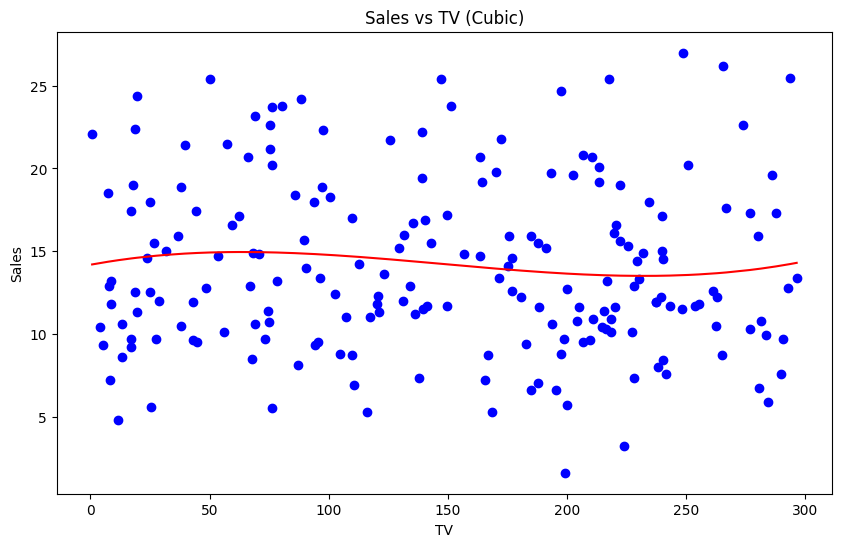

Feature: TV (Cubic)
MSE: 31.873015028057875
Root Mean Squared Error: 5.645619100511287
R-squared score: -0.012824226613725287


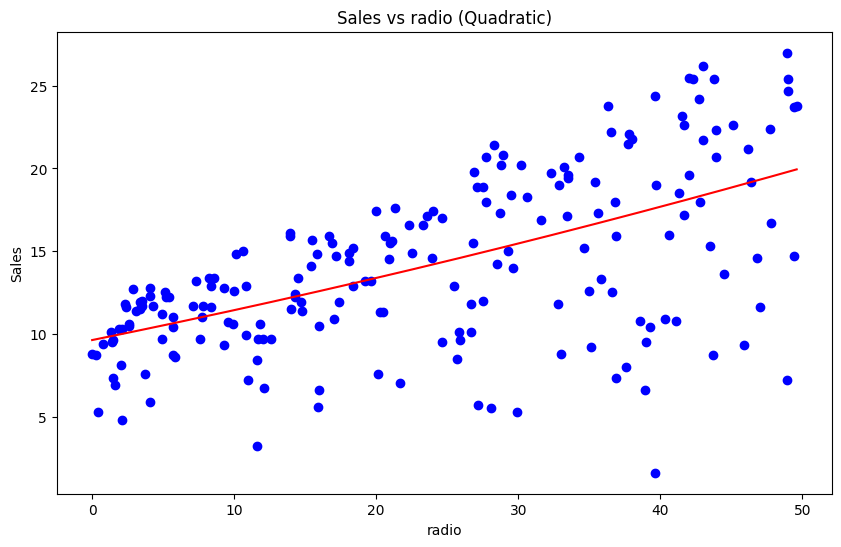

Feature: radio (Quadratic)
MSE: 24.273532734519854
Root Mean Squared Error: 4.926817708675637
R-squared score: 0.22866343214217577


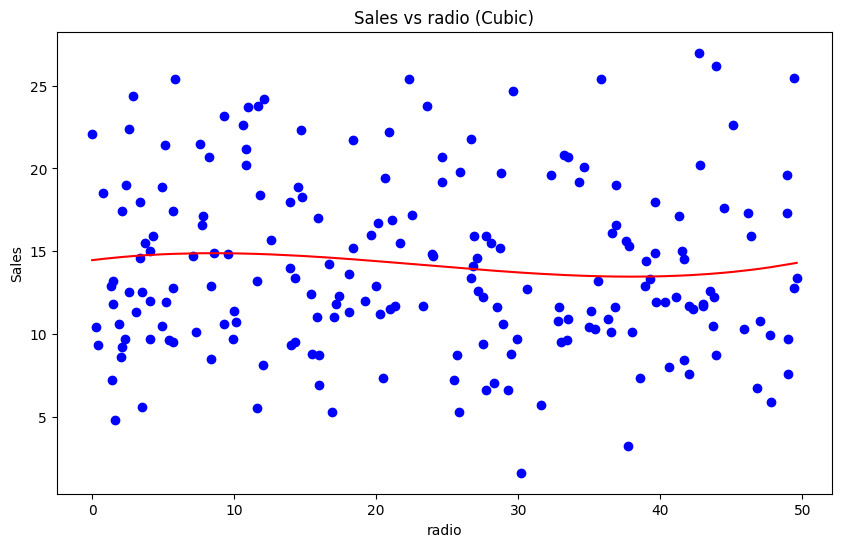

Feature: radio (Cubic)
MSE: 32.19132246017611
Root Mean Squared Error: 5.673739724394847
R-squared score: -0.022939036225453346


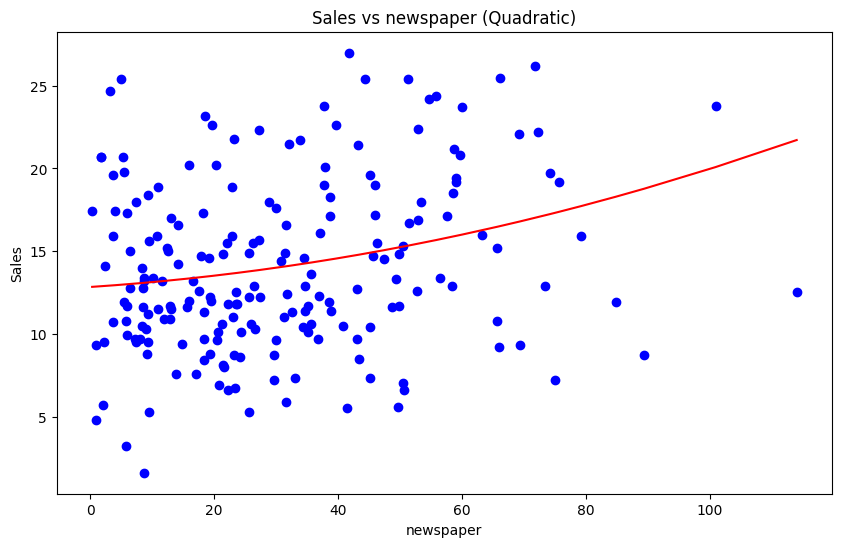

Feature: newspaper (Quadratic)
MSE: 32.867224005010414
Root Mean Squared Error: 5.732994331499937
R-squared score: -0.04441706266290213


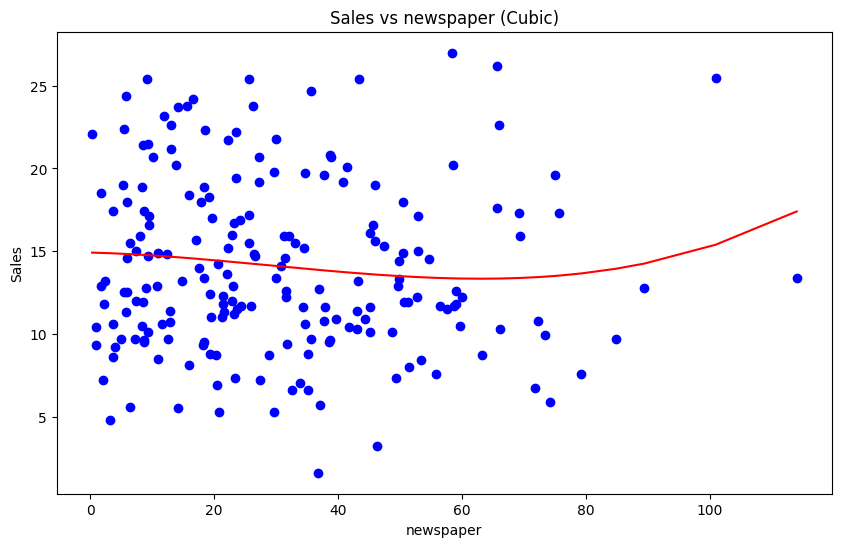

Feature: newspaper (Cubic)
MSE: 32.78620061242974
Root Mean Squared Error: 5.725923559778784
R-squared score: -0.04184239393903333


In [19]:
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

df = pd.read_csv('Advertising.csv')

features = ['TV', 'radio', 'newspaper']

for feature in features:

    X = df[feature].values.reshape(-1,1)
    y = df['sales'].values.reshape(-1,1)

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,regressor.predict(poly.fit_transform(X))), key=sort_axis)
    X, y_poly_pred = zip(*sorted_zip)
    plt.plot(X, y_poly_pred, color='red')
    plt.title(f'Sales vs {feature} (Quadratic)')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()
    
    print(f'Feature: {feature} (Quadratic)')
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared score:', metrics.r2_score(y_test, y_pred))

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue')
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,regressor.predict(poly.fit_transform(X))), key=sort_axis)
    X, y_poly_pred = zip(*sorted_zip)
    plt.plot(X, y_poly_pred, color='red')
    plt.title(f'Sales vs {feature} (Cubic)')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()
    
    print(f'Feature: {feature} (Cubic)')
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared score:', metrics.r2_score(y_test, y_pred))


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Advertising.csv"
data = pd.read_csv(file_path)

features = data[['TV', 'radio', 'newspaper']].values
sales = data['sales'].values

model = LinearRegression()
model.fit(features, sales)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
print(f"TV coefficient: {coefficients[0]:.4f}")
print(f"Radio coefficient: {coefficients[1]:.4f}")
print(f"Newspaper coefficient: {coefficients[2]:.4f}")
print(f"Intercept: {intercept:.4f}")

predictions = model.predict(features)
mse = mean_squared_error(sales, predictions)
r2 = r2_score(sales, predictions)

print("\nModel Evaluation:")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Coefficients:
TV coefficient: 0.0458
Radio coefficient: 0.1885
Newspaper coefficient: -0.0010
Intercept: 2.9389

Model Evaluation:
MSE: 2.7841
R² Score: 0.8972
